# <span style="color:#DC143C">Part 2</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier

lakers_purple = '#552583'
lakers_orange = '#FDB927'
SEED = 24

In [2]:
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [3]:
data1 = pd.read_csv("output1.csv")
data = data1.copy()

In [4]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_made_flag,opponent,remaining_time,home_court,injury
0,Jump Shot,Jump Shot,-157,0,1,0,2000,0.0,POR,622,0,0
1,Jump Shot,Jump Shot,-101,135,1,0,2000,1.0,POR,465,0,0
2,Jump Shot,Jump Shot,138,175,1,0,2000,0.0,POR,412,0,0
3,Driving Dunk Shot,Dunk,0,0,2,0,2000,1.0,POR,379,0,0
4,Jump Shot,Jump Shot,-145,-11,3,0,2000,0.0,POR,572,0,0


In [5]:
#feature_names = data.columns.tolist()
#feature_names

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   opponent            25697 non-null  object 
 9   remaining_time      25697 non-null  int64  
 10  home_court          25697 non-null  int64  
 11  injury              25697 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.4+ MB


In [7]:
y = data['shot_made_flag']
#X = data.drop('shot_made_flag', axis=1)
X = data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   opponent            25697 non-null  object 
 9   remaining_time      25697 non-null  int64  
 10  home_court          25697 non-null  int64  
 11  injury              25697 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.4+ MB


<font size = "5"> Balansiranost podataka </font>

In [8]:
scores = np.sum(y==1)
misses = np.sum(y==0)
scores, misses

(11465, 14232)

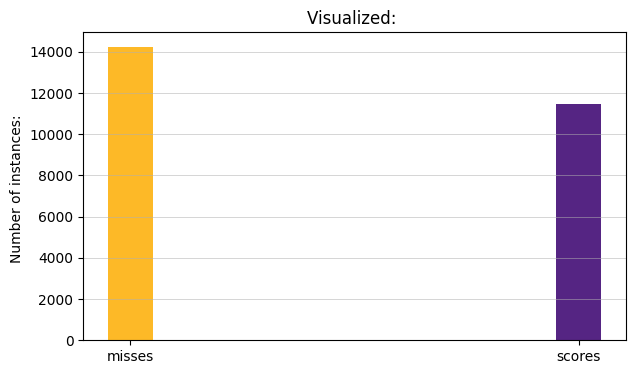

In [9]:
plt.figure(figsize = (7,4))
plt.title('Visualized: ')
plt.xticks([0,1])
plt.ylabel('Number of instances: ')
plt.bar(['misses', 'scores'], [misses, scores], width=0.1, color = [lakers_orange, lakers_purple])

plt.grid(axis = 'y', linewidth = 0.37)
#plt.tight_layout()
plt.show()

<font size = "5"> Training-test-validation split </font>

In [10]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state = SEED, stratify = y_train_val)

In [11]:
print("Trening set (shape): ",X_train.shape)
print("Test set (shape): ",X_test.shape)
print("Validation set (shape): ",X_val.shape)

Trening set (shape):  (15417, 12)
Test set (shape):  (5140, 12)
Validation set (shape):  (5140, 12)


In [12]:
print(type(X_train), type(X_test), type(X_val))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [13]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)


In [14]:
print(type(X_train), type(X_test), type(X_val))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


<font size = "5"> Stratification: visualised </font>

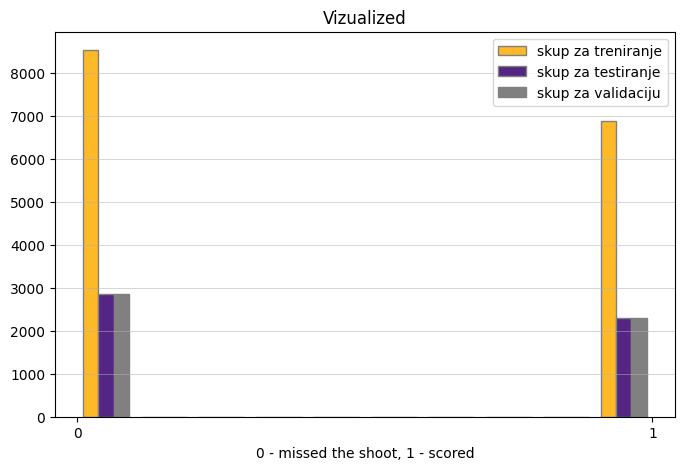

In [15]:
misses_train = np.sum(y_train==0)
scores_train = np.sum(y_train==1)
misses_test = np.sum(y_test==0)
scores_test = np.sum(y_test==1)
misses_val = np.sum(y_val==0)
scores_val = np.sum(y_val==1)

plt.figure(figsize = (8,5))

plt.title('Vizualized')
plt.xticks([0,1])
plt.xlabel('0 - missed the shoot, 1 - scored')
plt.hist([y_train, y_test, y_val], color=[lakers_orange, lakers_purple, 'gray'], label=['skup za treniranje', 'skup za testiranje', 'skup za validaciju'], edgecolor='gray')
plt.legend(loc='best')
plt.grid(axis = 'y', linewidth = 0.37)



plt.show()


<font size = "5"> Transform to numerical values </font>

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15417 entries, 8245 to 8985
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         15417 non-null  object 
 1   combined_shot_type  15417 non-null  object 
 2   loc_x               15417 non-null  int64  
 3   loc_y               15417 non-null  int64  
 4   period              15417 non-null  int64  
 5   playoffs            15417 non-null  int64  
 6   season              15417 non-null  int64  
 7   shot_made_flag      15417 non-null  float64
 8   opponent            15417 non-null  object 
 9   remaining_time      15417 non-null  int64  
 10  home_court          15417 non-null  int64  
 11  injury              15417 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 1.5+ MB


In [17]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns

['action_type', 'combined_shot_type', 'opponent']

<font size = "5"> action_type : shot_made : visualised </font>

In [18]:
len(X_train.action_type.unique())

23

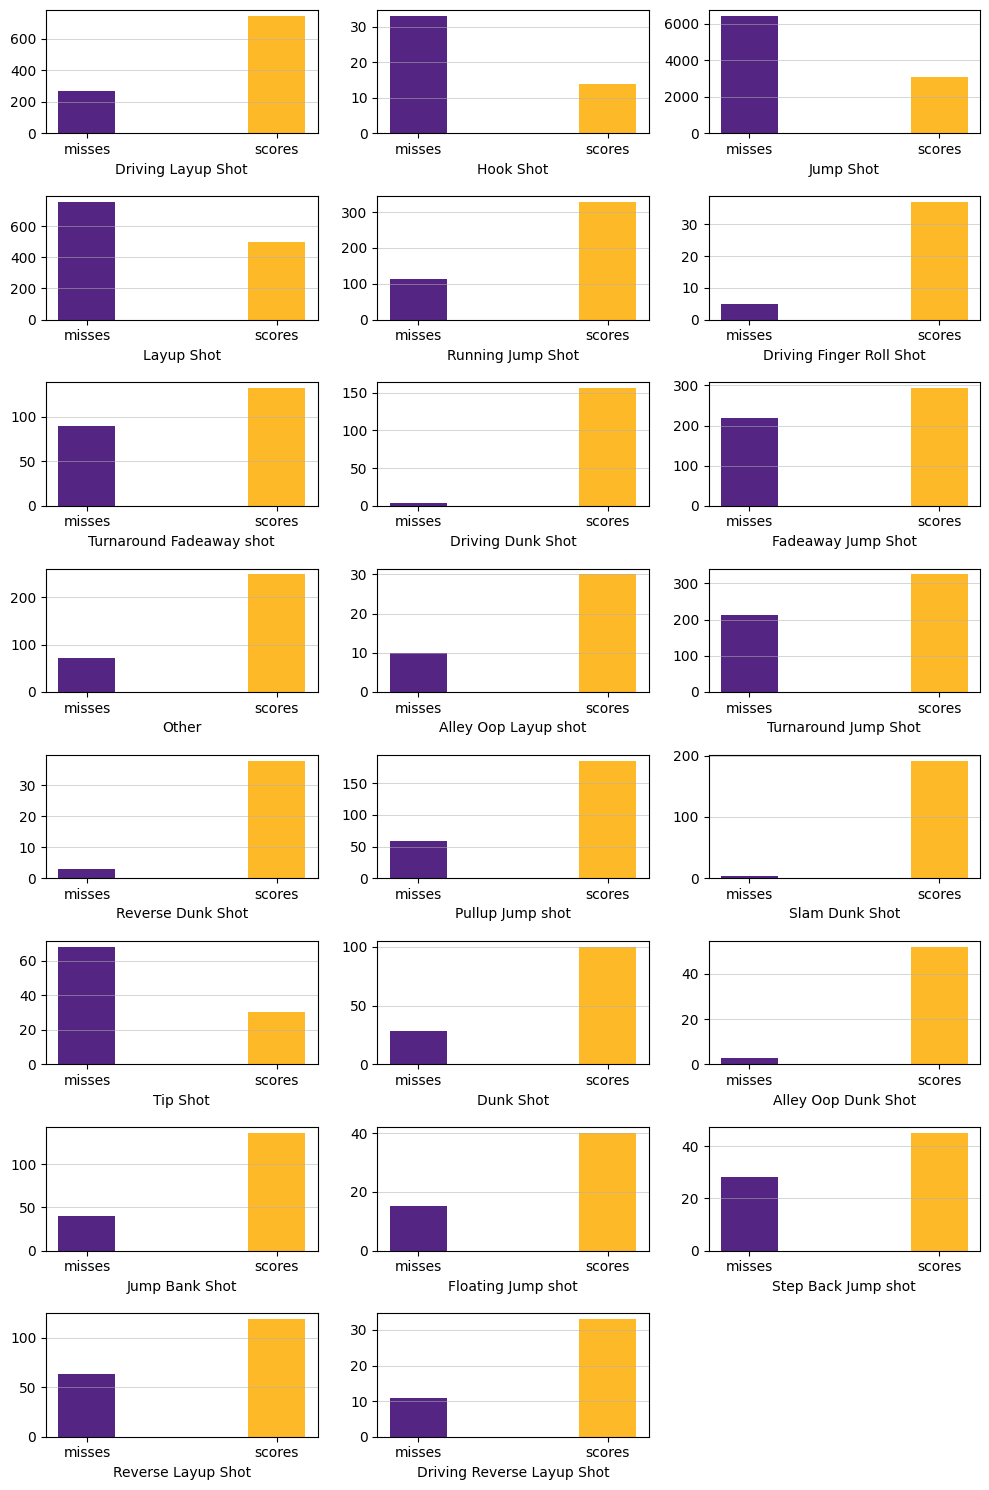

In [19]:
#########################!!!!!!!!!!!!!!!!!!!!!
action_type_unique = X_train.action_type.unique()
rows = 8
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10,15))
axes = axes.flatten()
i=0
for x in action_type_unique:
    curr_scored = np.sum(X_train[X_train['action_type'] == x].shot_made_flag == 1) 
    curr_missed = np.sum(X_train[X_train['action_type'] == x].shot_made_flag == 0)
    axes[i].set_xticks([0,1])
    axes[i].set_xlabel(x)
    axes[i].bar(['misses', 'scores'], [curr_missed, curr_scored], color = [lakers_purple, lakers_orange], width = 0.3, align = 'center')
    axes[i].grid(axis = 'y', linewidth = 0.37)
    i += 1

fig.delaxes(axes[23])

plt.tight_layout()
plt.show()

    #print(curr_scored, curr_missed)

<font size = "5"> combined_shot_type : shot_made : visualised </font>

In [20]:
len(X_train.combined_shot_type.unique())

6

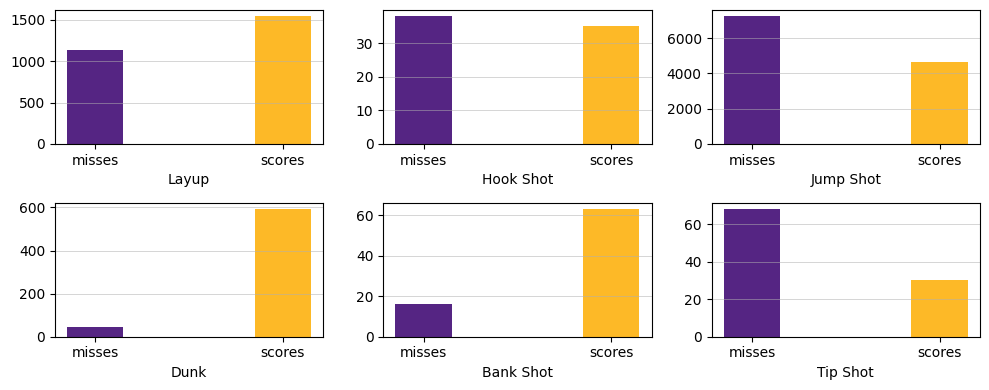

In [21]:
cs_type_unique = X_train.combined_shot_type.unique()
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10,4))
axes = axes.flatten()
i = 0
for x in cs_type_unique:
    curr_scored = np.sum(X_train[X_train['combined_shot_type'] == x].shot_made_flag == 1) 
    curr_missed = np.sum(X_train[X_train['combined_shot_type'] == x].shot_made_flag == 0)
    axes[i].set_xticks([0,1])
    axes[i].set_xlabel(x)
    axes[i].bar(['misses', 'scores'], [curr_missed, curr_scored], color = [lakers_purple, lakers_orange], width = 0.3, align = 'center')
    axes[i].grid(axis = 'y', linewidth = 0.37)
    i += 1

plt.tight_layout()
plt.show()


In [ ]:
#Not descriptive enough: we will drop it

<font size = "5"> Playoffs </font>

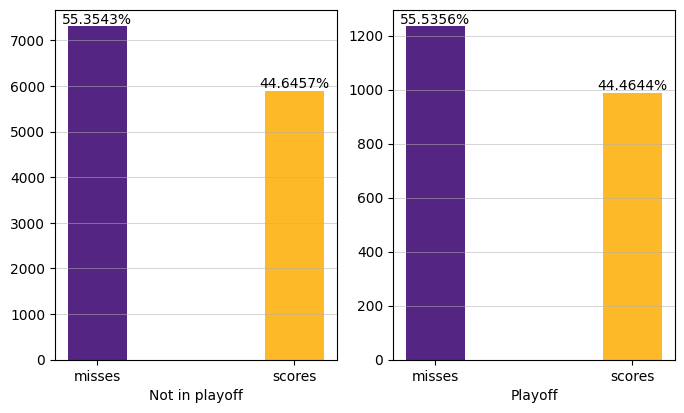

In [22]:
po_type_unique = X_train.playoffs.unique()
rows = 1
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(8,5))
axes = axes.flatten()
i = 0
for x in po_type_unique:
    curr_scored = np.sum(X_train[X_train['playoffs'] == x].shot_made_flag == 1) 
    curr_missed = np.sum(X_train[X_train['playoffs'] == x].shot_made_flag == 0)
    axes[i].set_xticks([0,1])
    axes[i].set_xlabel("Not in playoff" if x == 0 else "Playoff")
    bars = axes[i].bar(['misses', 'scores'], [curr_missed, curr_scored], color = [lakers_purple, lakers_orange], width = 0.3, align = 'center')
    axes[i].grid(axis = 'y', linewidth = 0.37)
    #print(curr_scored, curr_missed)
    values = [round(curr_missed/(curr_scored + curr_missed)*100, 4), round(curr_scored/(curr_scored + curr_missed)*100, 4) ]

    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
             str(value) + '%', ha='center', va='bottom')
    i += 1

#plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.show()

In [ ]:
#Difference between shot succession between when it s playoff game or not is almost nonexisting so we can remove that column.

In [23]:
X_train = X_train.drop(['playoffs'], axis=1)
X_test = X_test.drop(['playoffs'], axis=1)
X_val = X_val.drop(['playoffs'], axis=1)

<font size = "5"> X_train, X_test, X_val drop </font>

In [24]:
####################!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# X_train = X_train.drop(['combined_shot_type'], axis=1)
# X_test = X_test.drop(['combined_shot_type'], axis=1)
# X_val = X_val.drop(['combined_shot_type'], axis=1)
# print(X_train.shape)

In [25]:
print(X_train.shape, X_test.shape, X_val.shape)

(15417, 11) (5140, 11) (5140, 11)


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15417 entries, 8245 to 8985
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         15417 non-null  object 
 1   combined_shot_type  15417 non-null  object 
 2   loc_x               15417 non-null  int64  
 3   loc_y               15417 non-null  int64  
 4   period              15417 non-null  int64  
 5   season              15417 non-null  int64  
 6   shot_made_flag      15417 non-null  float64
 7   opponent            15417 non-null  object 
 8   remaining_time      15417 non-null  int64  
 9   home_court          15417 non-null  int64  
 10  injury              15417 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.4+ MB


<font size = "5"> Opponent dropping </font>

In [27]:
X_train = X_train.drop(['opponent'], axis=1)
X_test = X_test.drop(['opponent'], axis=1)
X_val = X_val.drop(['opponent'], axis=1)
print(X_train.shape)

(15417, 10)


<font size = "5"> Dummy variables for shot_type </font>

In [28]:
#raw = pd.concat([raw, pd.get_dummies(raw[var], prefix=var)], 1)#
X_train = pd.concat([X_train, pd.get_dummies(X_train['action_type'], prefix='action_type')], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test['action_type'], prefix='action_type')], axis=1)
X_val = pd.concat([X_val, pd.get_dummies(X_val['action_type'], prefix='action_type')], axis=1)

In [29]:
#####################!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# X_train = pd.concat([X_train, pd.get_dummies(X_train['combined_shot_type'], prefix='combined')], axis=1)
# X_test = pd.concat([X_test, pd.get_dummies(X_test['combined_shot_type'], prefix='combined')], axis=1)
# X_val = pd.concat([X_val, pd.get_dummies(X_val['combined_shot_type'], prefix='combined')], axis=1)

In [30]:
X_train.info()
feature_names = X_train.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Index: 15417 entries, 8245 to 8985
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   action_type                             15417 non-null  object 
 1   combined_shot_type                      15417 non-null  object 
 2   loc_x                                   15417 non-null  int64  
 3   loc_y                                   15417 non-null  int64  
 4   period                                  15417 non-null  int64  
 5   season                                  15417 non-null  int64  
 6   shot_made_flag                          15417 non-null  float64
 7   remaining_time                          15417 non-null  int64  
 8   home_court                              15417 non-null  int64  
 9   injury                                  15417 non-null  int64  
 10  action_type_Alley Oop Dunk Shot         15417 non-null  bool 

In [31]:
X_train = X_train.drop(['action_type', 'shot_made_flag'], axis=1)
X_test = X_test.drop(['action_type', 'shot_made_flag'], axis=1)
X_val = X_val.drop(['action_type', 'shot_made_flag'], axis=1)

In [32]:
########################!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X_train = X_train.drop(['combined_shot_type'], axis=1)
X_test = X_test.drop(['combined_shot_type'], axis=1)
X_val = X_val.drop(['combined_shot_type'], axis=1)
print(X_train.shape)

(15417, 30)


In [33]:
feature_names = X_train.columns.tolist()

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15417 entries, 8245 to 8985
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   loc_x                                   15417 non-null  int64
 1   loc_y                                   15417 non-null  int64
 2   period                                  15417 non-null  int64
 3   season                                  15417 non-null  int64
 4   remaining_time                          15417 non-null  int64
 5   home_court                              15417 non-null  int64
 6   injury                                  15417 non-null  int64
 7   action_type_Alley Oop Dunk Shot         15417 non-null  bool 
 8   action_type_Alley Oop Layup shot        15417 non-null  bool 
 9   action_type_Driving Dunk Shot           15417 non-null  bool 
 10  action_type_Driving Finger Roll Shot    15417 non-null  bool 
 11  action_type_Drivin

In [35]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5140 entries, 7523 to 19743
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   loc_x                                   5140 non-null   int64
 1   loc_y                                   5140 non-null   int64
 2   period                                  5140 non-null   int64
 3   season                                  5140 non-null   int64
 4   remaining_time                          5140 non-null   int64
 5   home_court                              5140 non-null   int64
 6   injury                                  5140 non-null   int64
 7   action_type_Alley Oop Dunk Shot         5140 non-null   bool 
 8   action_type_Alley Oop Layup shot        5140 non-null   bool 
 9   action_type_Driving Dunk Shot           5140 non-null   bool 
 10  action_type_Driving Finger Roll Shot    5140 non-null   bool 
 11  action_type_Drivin

In [36]:
#check if order of columns is the same
columns_match = list(X_train.columns) == list(X_test.columns) == list(X_val.columns)
if columns_match:
    print("The order of columns in all sets is the same.")
else:
    print("The order of columns in all sets is different.")

The order of columns in all sets is the same.


<font size = "5"> Save all numerical values </font>

In [37]:
type(X_train)

pandas.core.frame.DataFrame

In [38]:
X_test.to_csv('X_test.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)


<font size = "5"> Korelacija </font>

In [39]:
#X_train.corr()

In [40]:
type(X_val)

pandas.core.frame.DataFrame

<font size = "5"> Standardization </font>

In [41]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
type(X_val)

pandas.core.frame.DataFrame

<font size = "5"> Logistic regression </font>

In [43]:
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
logistic_regression_model.intercept_

array([-0.16974217])

In [45]:
logistic_regression_model.coef_

array([[ 0.04988899,  0.03094264, -0.07671439, -0.01578008,  0.06134273,
         0.03951636, -0.09001477,  0.16074659,  0.04731112,  0.35636563,
         0.0947187 ,  0.21232707,  0.05331482,  0.1010469 ,  0.02350565,
         0.04880248, -0.0587815 ,  0.11410635, -0.4506127 , -0.15930525,
         0.15618134,  0.13487128,  0.12201085,  0.04910954,  0.14407962,
         0.40876565,  0.02802797, -0.07894675,  0.03525894,  0.04553323]])

In [46]:
#Interpretacija koeficijenata

<Figure size 800x500 with 0 Axes>

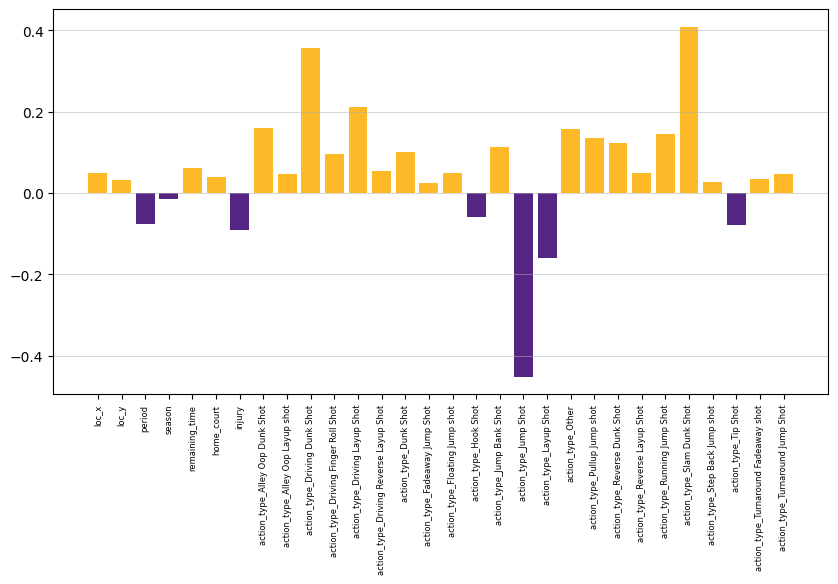

In [47]:
#feature_names = (pd.DataFrame(X_train)).columns.tolist()
plt.figure(figsize = (8,5))
N = len(feature_names)
values = logistic_regression_model.coef_[0]
plt.figure(figsize=(10, 5))
#plt.bar(np.arange(0, N), values, color = lakers_purple)
plt.bar(np.arange(0, N), values, color=[lakers_orange if v >= 0 else lakers_purple for v in values])
plt.xticks(np.arange(0, N), feature_names, rotation='vertical', fontsize = 6)
plt.grid(axis='y', linewidth = 0.37)
#plt.tight_layout()
plt.show()

In [48]:
###Evaluacija

In [49]:
y_test_predicted = logistic_regression_model.predict(X_test)

In [50]:
metrics.accuracy_score(y_test, y_test_predicted)

0.6824902723735409

In [51]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75      2847
         1.0       0.72      0.47      0.57      2293

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.66      5140
weighted avg       0.69      0.68      0.67      5140



In [52]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[2439,  408],
       [1224, 1069]], dtype=int64)

In [53]:
y_train_predicted = logistic_regression_model.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
train_accuracy

0.6827528053447492

<font size = "5"> KNN </font>

In [54]:
k_range = list(range(1, 10))
scores = []
maks = 0
best_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc) 
    if acc > maks and k!=1:
        maks = acc
        best_k = k

In [55]:
print('Parametar k sa najvecom preciznoscu: ', best_k)

Parametar k sa najvecom preciznoscu:  8


In [56]:
#add: visualisation

In [57]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_pred_knn,y_test)
print('Tačnost: {0:.2f}%'.format(knn_acc*100))

Tačnost: 65.86%


In [58]:
knn_cm = confusion_matrix(y_pred_knn,y_test)
knn_cm

array([[2340, 1248],
       [ 507, 1045]], dtype=int64)

In [59]:
#Predikcija na trening setu

In [60]:
y_pred_train_knn = knn.predict(X_train)
knn_train_acc = accuracy_score(y_pred_train_knn, y_train)
print('Tačnost: {0:.2f}%'.format(knn_train_acc*100))

Tačnost: 72.45%


In [61]:
knn_train_cm = confusion_matrix(y_pred_train_knn, y_train)
knn_train_cm

array([[7519, 3229],
       [1019, 3650]], dtype=int64)

In [62]:
##Cuvanje modela?

<font size = "5"> Stabla odlucivanja </font>

In [63]:
criterion = ['gini', 'entropy']
max_depth = [5,6,7,8,9]
dtc_acc = 0
best_depth = 0
dtc_criterion = ''
dtc = None
y_pred_dtc = []
scores = {}

for i in range(len(criterion)):
    print("Criterion = ", criterion[i])
    for j in range(len(max_depth)):
        print("\t max_depth=", max_depth[j])
        model = DecisionTreeClassifier(criterion = criterion[i], max_features=0.9, max_depth=max_depth[j], random_state=7)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_pred, y_test)
        print("\t\t Accuracy: ", acc)
        
        if criterion[i] not in scores.keys():
            scores[criterion[i]] = []
        
        scores[criterion[i]].append(acc)
        
        if dtc_acc < acc:
            best_criterion = criterion[i]
            best_depthp = max_depth[j]
            dtc_acc = acc
            dtc = model
            y_pred_dtc = y_pred

Criterion =  gini
	 max_depth= 5
		 Accuracy:  0.6809338521400778
	 max_depth= 6
		 Accuracy:  0.6832684824902724
	 max_depth= 7
		 Accuracy:  0.6782101167315175
	 max_depth= 8
		 Accuracy:  0.67431906614786
	 max_depth= 9
		 Accuracy:  0.6680933852140077
Criterion =  entropy
	 max_depth= 5
		 Accuracy:  0.6811284046692607
	 max_depth= 6
		 Accuracy:  0.6801556420233463
	 max_depth= 7
		 Accuracy:  0.6803501945525292
	 max_depth= 8
		 Accuracy:  0.6805447470817121
	 max_depth= 9
		 Accuracy:  0.6698443579766536


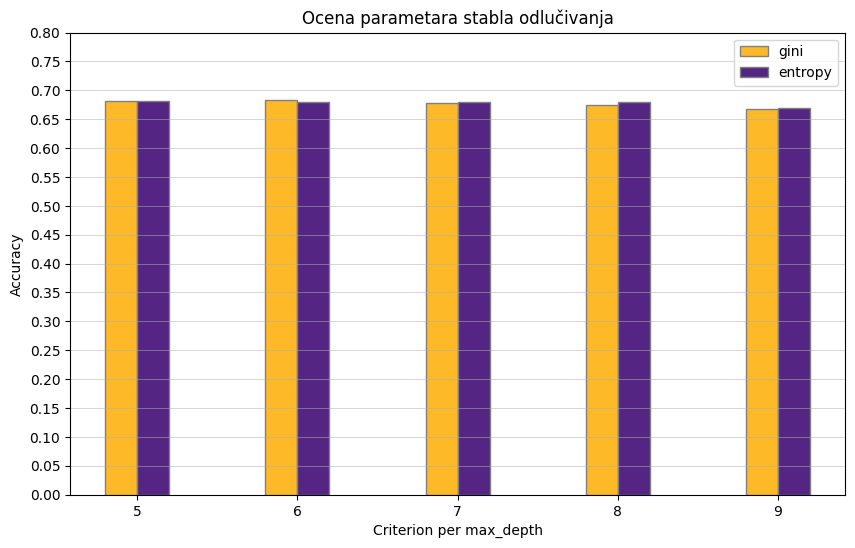

In [64]:
cmap = [lakers_orange, lakers_purple]
x_axis = np.arange(len(max_depth))
move = [-1/2, 1/2]
width = 0.2

plt.figure(figsize = (10,6))
for i in range(len(move)):
    plt.bar(x_axis + width*move[i], scores[criterion[i]], width = width, color = cmap[i], edgecolor='gray')

plt.xticks(x_axis, max_depth)
plt.yticks(np.linspace(0,0.8,17))

plt.title("Ocena parametara stabla odlučivanja")
plt.xlabel("Criterion per max_depth")
plt.ylabel("Accuracy")
plt.legend(criterion)
plt.grid(axis='y', linewidth = 0.37)

#plt.savefig("assets/pictures/CM_1_DTC_best_parameters.jpg")

plt.show()

In [65]:
##Prediction on test set

In [66]:
dtc

DecisionTreeClassifier(max_depth=6, max_features=0.9, random_state=7)

In [67]:
print('Tačnost: {0:.2f}%'.format(dtc_acc*100))

Tačnost: 68.33%


In [68]:
dtc_test_cm = confusion_matrix(y_pred_dtc, y_test)
print(dtc_test_cm)

[[2450 1231]
 [ 397 1062]]


In [69]:
##Prediction on training set

In [70]:
y_pred_train_dtc = dtc.predict(X_train)
dtc_train_acc = accuracy_score(y_pred_train_dtc, y_train)
print('Tačnost: {0:.2f}%'.format(dtc_train_acc*100))

Tačnost: 68.53%


In [71]:
dtc_train_cm = confusion_matrix(y_pred_train_dtc, y_train)
print(dtc_train_cm)

[[7324 3637]
 [1214 3242]]


<font size = "5"> Ranndom Forests </font>

In [72]:
rf = RandomForestClassifier(n_estimators = 20, max_depth = 3, random_state = 7)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [73]:
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_pred_rf, y_test)
print('Tačnost: {0:.2f}%'.format(rf_acc*100))

Tačnost: 66.15%


In [74]:
rf_cr = classification_report(y_pred_rf, y_test)
print(rf_cr)

              precision    recall  f1-score   support

         0.0       0.80      0.66      0.72      3443
         1.0       0.49      0.66      0.56      1697

    accuracy                           0.66      5140
   macro avg       0.64      0.66      0.64      5140
weighted avg       0.70      0.66      0.67      5140



In [75]:
rf_cm = confusion_matrix(y_pred_rf, y_test)
rf_cm

array([[2275, 1168],
       [ 572, 1125]], dtype=int64)

In [76]:
# Predikcija na trening setu

In [77]:
y_pred_train_rf = rf.predict(X_train)
rf_train_acc = accuracy_score(y_pred_train_rf, y_train)
print('Tačnost: {0:.2f}%'.format(rf_train_acc*100))

Tačnost: 66.32%


In [78]:
### Pokušaj da se dobiju malo bolji rezultati 

In [79]:
criterion = ['gini', 'entropy']
max_depth = [5,6,7,8,9]
n_estimators = [20,50,100]
rfc_acc = 0
best_criterion = ''
best_depth = 0
best_estimator = 0
rfc = None
y_pred_rfc = []
for i in range(len(criterion)):
    print("criterion: {}".format(criterion[i]))
    for j in range(len(max_depth)):
        print("\t max_depth: {}".format(max_depth[j]))
        for k in range(len(n_estimators)):
            print("\t\t n_estimators: {}".format(n_estimators[k]))
            model = RandomForestClassifier(criterion = criterion[i], n_estimators = n_estimators[k], max_depth = max_depth[j], random_state = 7)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_pred, y_test)
            print('\t\t\t Accuracy: {}'.format(acc))
            if dtc_acc < acc:
                best_criterion = criterion[i]
                best_depth = max_depth[j]
                best_estimator = n_estimators[k]
                rfc_acc = acc
                rfc = model
                y_pred_rfc = y_pred

criterion: gini
	 max_depth: 5
		 n_estimators: 20
			 Accuracy: 0.6826848249027238
		 n_estimators: 50
			 Accuracy: 0.6793774319066148
		 n_estimators: 100
			 Accuracy: 0.6768482490272374
	 max_depth: 6
		 n_estimators: 20
			 Accuracy: 0.683852140077821
		 n_estimators: 50
			 Accuracy: 0.6848249027237354
		 n_estimators: 100
			 Accuracy: 0.6850194552529183
	 max_depth: 7
		 n_estimators: 20
			 Accuracy: 0.6824902723735409
		 n_estimators: 50
			 Accuracy: 0.6844357976653697
		 n_estimators: 100
			 Accuracy: 0.6842412451361868
	 max_depth: 8
		 n_estimators: 20
			 Accuracy: 0.6826848249027238
		 n_estimators: 50
			 Accuracy: 0.6846303501945525
		 n_estimators: 100
			 Accuracy: 0.6836575875486381
	 max_depth: 9
		 n_estimators: 20
			 Accuracy: 0.6830739299610895
		 n_estimators: 50
			 Accuracy: 0.6834630350194553
		 n_estimators: 100
			 Accuracy: 0.6836575875486381
criterion: entropy
	 max_depth: 5
		 n_estimators: 20
			 Accuracy: 0.6830739299610895
		 n_estimators: 50
			

In [80]:
print('best max_depth: ',best_depth)
print('best n_estimators: ',best_estimator)

best max_depth:  9
best n_estimators:  100


In [81]:
print('Tačnost: {0:.2f}%'.format(rfc_acc*100))

Tačnost: 68.37%


In [82]:
rfc

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=7)

In [83]:
rfc.fit(X_val, y_val)

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=7)

In [84]:
best_y_pred_rfc = rfc.predict(X_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [85]:
best_rfc_acc = accuracy_score(best_y_pred_rfc, y_test)
print('Tačnost: {0:.2f}%'.format(best_rfc_acc*100))
best_rfc_cm = confusion_matrix(best_y_pred_rfc, y_test)
best_rfc_cm

Tačnost: 65.25%


array([[2544, 1483],
       [ 303,  810]], dtype=int64)

In [86]:
#################NOT FINISHED

<font size = "5"> XGBoost </font>

In [87]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_pred_xgb, y_test)
print('Tačnost: {0:.2f}%'.format(xgb_acc*100))

Tačnost: 66.26%


In [89]:
xgb_cr = classification_report(y_pred_xgb, y_test)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3447
           1       0.49      0.67      0.56      1693

    accuracy                           0.66      5140
   macro avg       0.65      0.66      0.64      5140
weighted avg       0.70      0.66      0.67      5140



In [90]:
xgb_cm = confusion_matrix(y_pred_xgb, y_test)
print(xgb_cm)

[[2280 1167]
 [ 567 1126]]


In [91]:
y_train_pred_xgb = xgb.predict(X_train)
print(y_train_pred_xgb)
xgb_train_acc = accuracy_score(y_train_pred_xgb, y_train)
print('Tačnost: {0:.2f}%'.format(xgb_train_acc*100))

[1 0 0 ... 0 0 0]
Tačnost: 78.30%
